In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/FootballAnalysis/Code/efficient-net-architecture')

Mounted at /content/drive


<IPython.core.display.Javascript object>

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 35.1MB/s]


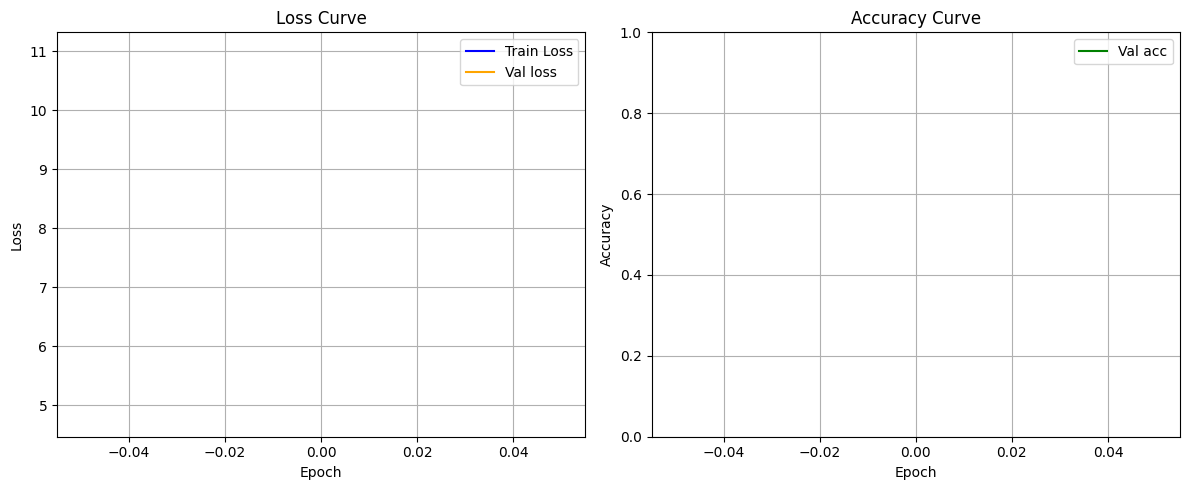

1/20|Train Loss:11.0133 | Valid Loss 4.7772| Valid Acc 0.9622 |Time:2m 47s


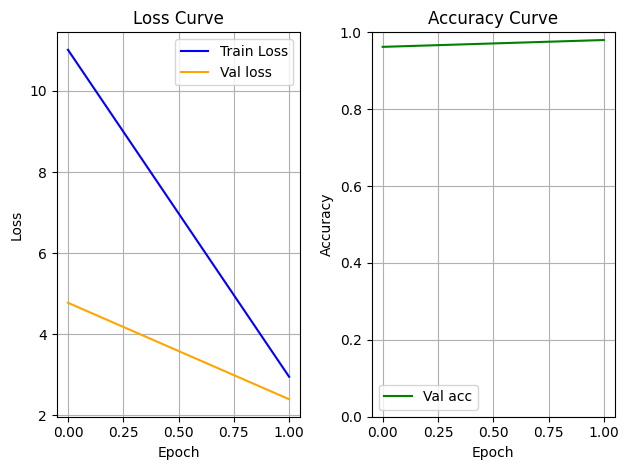

2/20|Train Loss:2.9532 | Valid Loss 2.3992| Valid Acc 0.9800 |Time:0m 18s


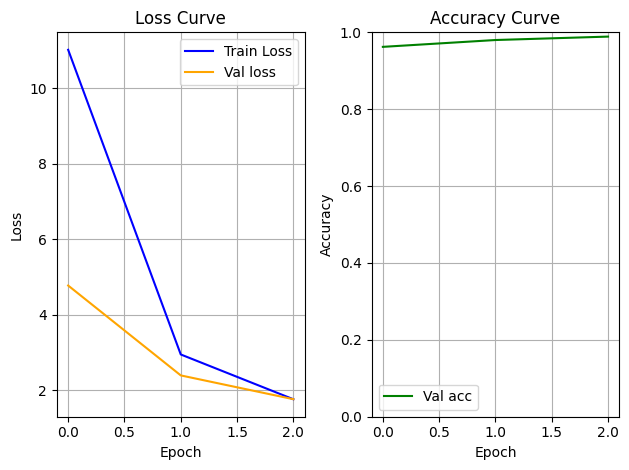

3/20|Train Loss:1.7684 | Valid Loss 1.7698| Valid Acc 0.9889 |Time:0m 17s


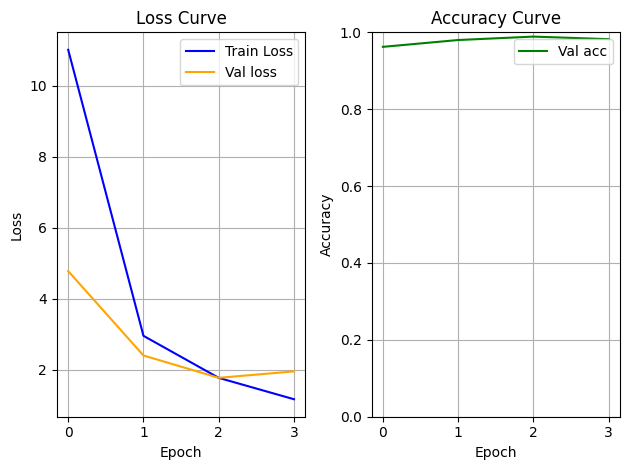

4/20|Train Loss:1.1659 | Valid Loss 1.9515| Valid Acc 0.9822 |Time:0m 17s


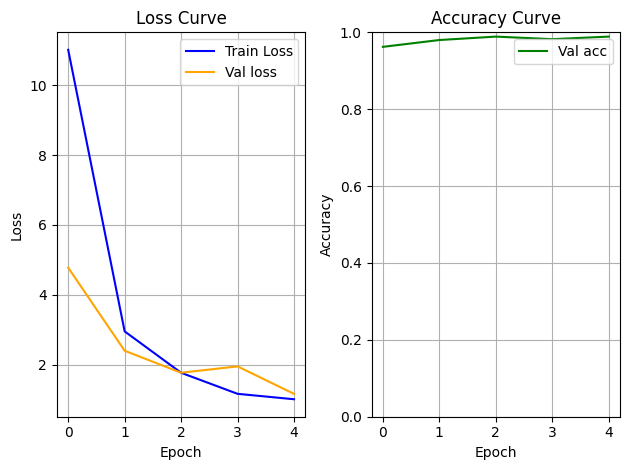

5/20|Train Loss:1.0107 | Valid Loss 1.1644| Valid Acc 0.9889 |Time:0m 17s


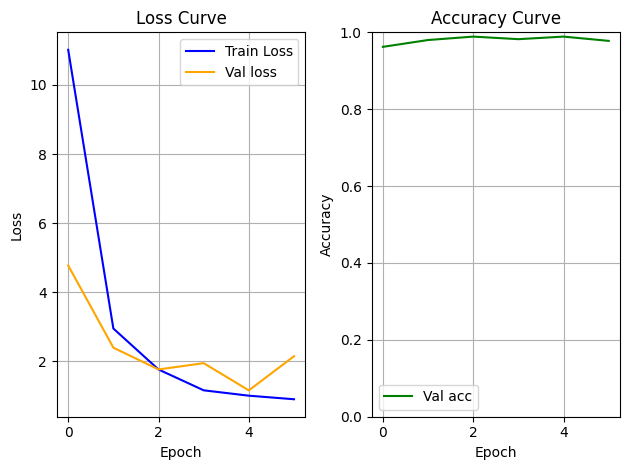

6/20|Train Loss:0.9077 | Valid Loss 2.1527| Valid Acc 0.9778 |Time:0m 17s


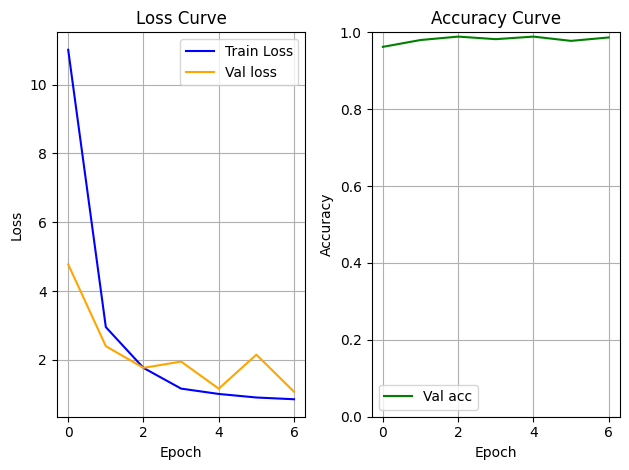

7/20|Train Loss:0.8568 | Valid Loss 1.0750| Valid Acc 0.9867 |Time:0m 17s


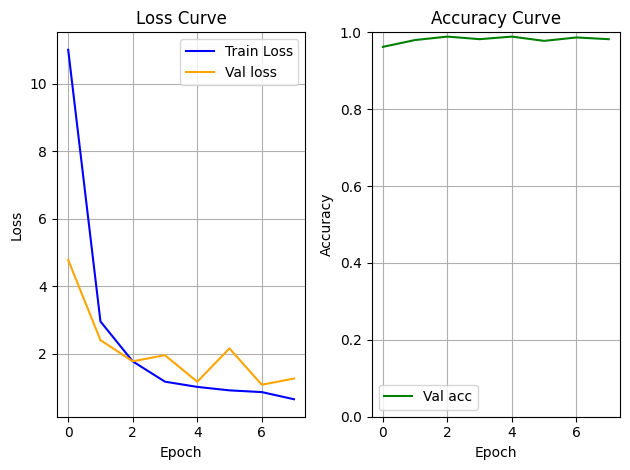

8/20|Train Loss:0.6444 | Valid Loss 1.2596| Valid Acc 0.9822 |Time:0m 17s


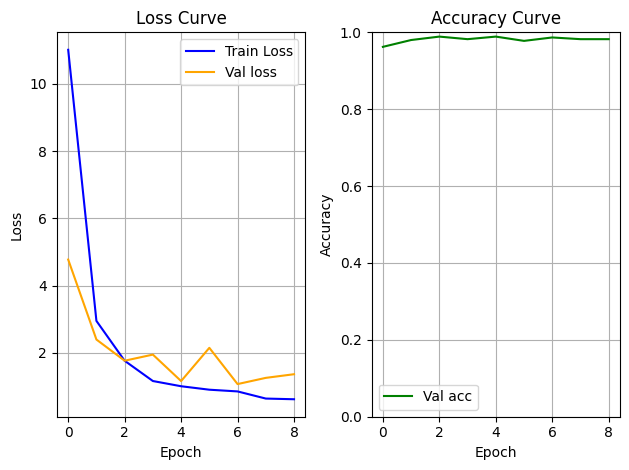

9/20|Train Loss:0.6239 | Valid Loss 1.3681| Valid Acc 0.9822 |Time:0m 17s


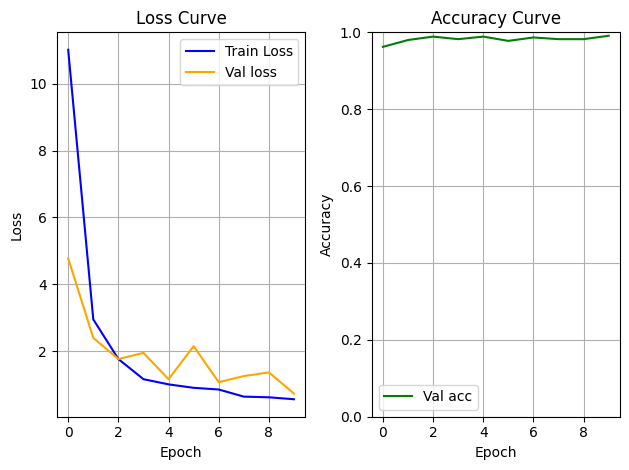

10/20|Train Loss:0.5658 | Valid Loss 0.7338| Valid Acc 0.9911 |Time:0m 18s


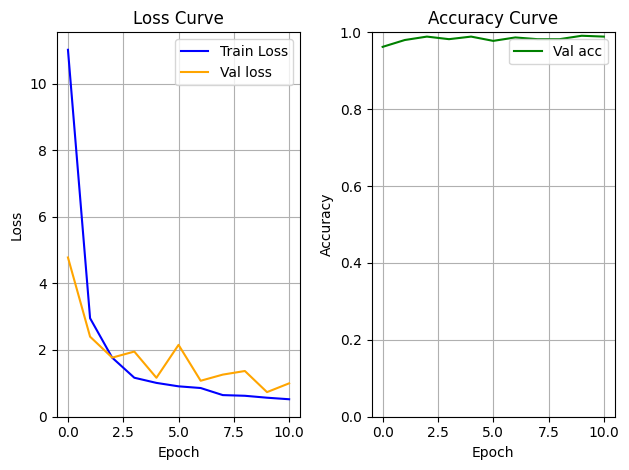

11/20|Train Loss:0.5197 | Valid Loss 0.9976| Valid Acc 0.9889 |Time:0m 17s


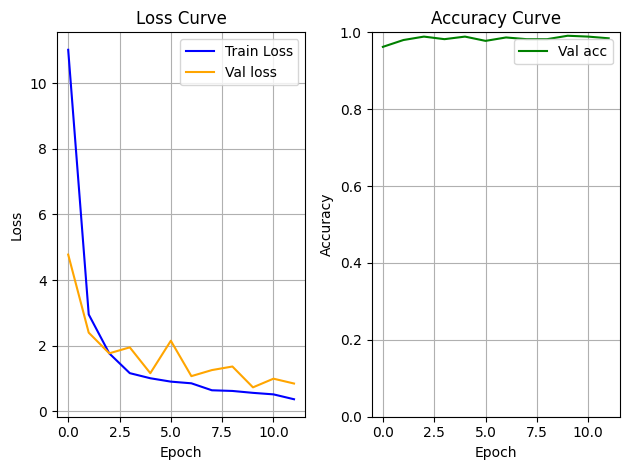

12/20|Train Loss:0.3712 | Valid Loss 0.8500| Valid Acc 0.9844 |Time:0m 17s


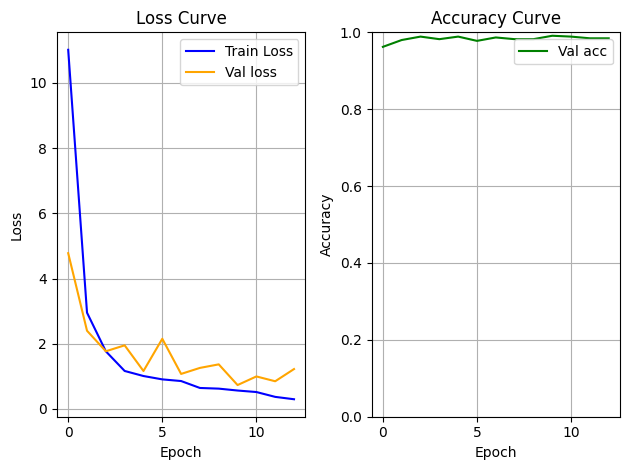

13/20|Train Loss:0.2984 | Valid Loss 1.2245| Valid Acc 0.9844 |Time:0m 17s


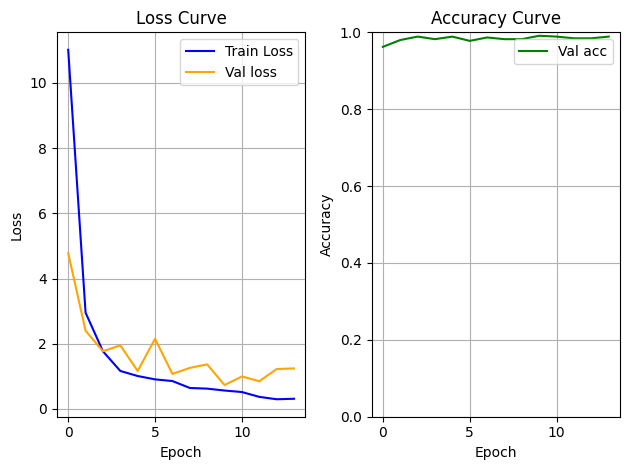

14/20|Train Loss:0.3134 | Valid Loss 1.2436| Valid Acc 0.9889 |Time:0m 17s


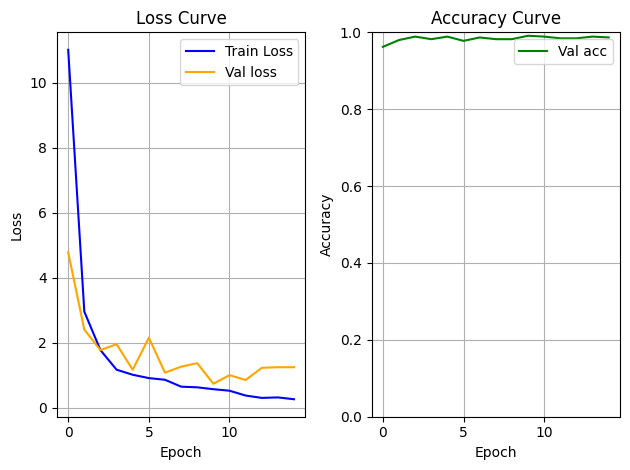

15/20|Train Loss:0.2569 | Valid Loss 1.2426| Valid Acc 0.9867 |Time:0m 17s


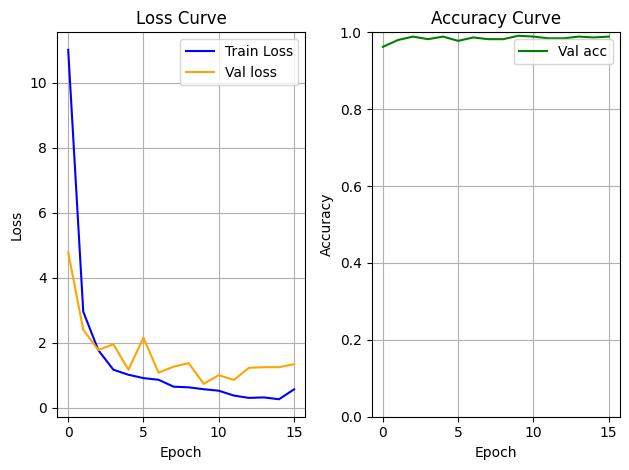

16/20|Train Loss:0.5607 | Valid Loss 1.3373| Valid Acc 0.9889 |Time:0m 17s


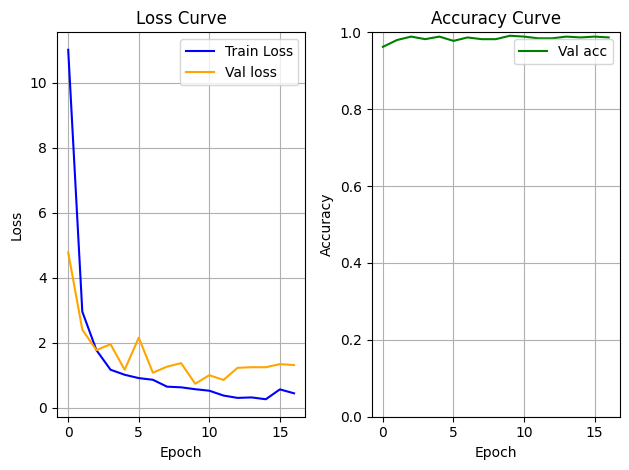

17/20|Train Loss:0.4398 | Valid Loss 1.3099| Valid Acc 0.9867 |Time:0m 17s
Early stopping triggered!


FileNotFoundError: [Errno 2] No such file or directory: 'content/drive/myDrive/FootballAnalysis/Results/training_metrics.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
from IPython.display import Javascript, display
import torch
from torch.utils.data import DataLoader
from my_module import StratifiedSplit, SoccerEventClassifier,train_model
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder


# Astuce Anti-deconnexion

def keep_alive():
  display(Javascript('''
  function KeepAlive(){
    console.log("Keeping alive");
    GoogleColab.notebook.kernel.execute("temp="+Date.now());
  }
  setInterval(keep_alive,4500)
  '''))

keep_alive()
#root dir
root_dir='/content/drive/MyDrive/FootballAnalysis/data/train'

#Transformations
train_transform= transforms.Compose([
      transforms.RandomResizedCrop(224,scale=(.6,1.)),
      transforms.RandomHorizontalFlip(),
      transforms.ColorJitter(brightness=.3,contrast=.3),
      transforms.RandomErasing(p=.5,scale=(.02,.1)),
      transforms.ToTensor(),
      transforms.Normalize([.485,.456,.406],[.229,.224,.225])
      ])
val_transform= transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize([.485,.456,.406],[.229,.224,.225])
     ])
batch_size=16
num_epochs=20
learning_rate=1e-4
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#full Dataset
full_dataset= ImageFolder(root_dir)
stratified_split= StratifiedSplit(test_size=.1)
train_dataset,val_dataset= stratified_split(full_dataset)

#Applying transformations
train_dataset.dataset.transform=train_transform
val_dataset.dataset.transform= val_transform

#Loaders
train_loader= DataLoader(train_dataset,
                         num_workers=2,
                         pin_memory=True,
                         batch_size=16,
                         shuffle=True)
val_loader= DataLoader(val_dataset,
                       num_workers=2,
                       pin_memory=True,
                       batch_size=32,
                       shuffle=False)

#model
model= SoccerEventClassifier().to(device)

if __name__=="__main__":
  train_model(model=model,batch_size=batch_size,num_epochs=num_epochs,
              learning_rate=learning_rate, device=device,
              val_loader=val_loader,train_loader=train_loader)


In [ ]:
|sys.path.append('/content/drive/MyDrive/FootballAnalysis/Code/efficient-net-architecture')

In [ ]:
print('Boblolo man')

In [ ]:
"let's go"